# Impact of vocabulary size
For the baselines we represent documents as character or word uni-grams. We can control the size of the vocabulary by setting the maximum number of features to extract. More features will result in a larger vocabulary, which may improve the model's performance. However, a larger vocabulary also increases the computational cost of training and inference. In this experiment, we investigate the impact of the vocabulary size on the performance of the Naive Bayes classifier. Before we start, let us define the notion of vocabulary coverage.

The vocabulary coverage is the proportion of tokens in the training data that are covered by the vocabulary. A coverage of 100% means that all tokens in the training data are included in the vocabulary. We will use the coverage as a measure of how well the vocabulary represents the training data. Formally, the token-level coverage can be defined as follows:

$$
\text{Coverage} = \frac{\sum_{i=1}^{N} \mathbf{1} (t_i \in V)}{N}
$$

where $N$ is the number of tokens in the training data, $t_i$ is the $i$-th token, and $V$ is the vocabulary.

## Character uni-grams
Let us start by evaluating the performance of the Naive Bayes classifier on character uni-grams with different vocabulary sizes.

In [12]:
# Test different vocab sizes for char uni-grams
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type char --vocab-size 256
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type char --vocab-size 512
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type char --vocab-size 1024
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type char --vocab-size 8192

2025-02-21 15:45:17,595 - langlens.__main__ - INFO - Loading dataset from ../data/wili_subset_khan.csv
2025-02-21 15:45:17,880 - langlens.__main__ - INFO - Training dataset size: 17599, Val/Test dataset size: 2200
2025-02-21 15:45:17,880 - langlens.__main__ - INFO - Vectorizing and normalizing data...
2025-02-21 15:45:23,189 - langlens.langlens.baseline.vectorize - INFO - The vocabulary covers 92.44% of the training data, 92.03% of the validation data, and 93.02% of the test data.
2025-02-21 15:45:23,235 - langlens.__main__ - INFO - Training classifier...
2025-02-21 15:45:23,302 - langlens.__main__ - INFO - Training set performance:
2025-02-21 15:45:23,433 - langlens.langlens.evaluation - INFO -               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       809
     Chinese       0.99      0.96      0.97       812
       Dutch       0.95      0.91      0.93       779
     English       0.68      0.98      0.80       814
    Estonian       0.99 

The following table shows a summary of the results for the validation set:

| vocab_size | coverage | accuracy | F1  |
|------------|----------|----------|-----|
| 256        | 92%      | 96%      | 96% |
| 512        | 95.8%    | 96%      | 97% |
| 1024       | 98%      | 96%      | 96% |
| 8192       | 100%     | 94%      | 94% |

We observe that coverage increases with higher vocabulary sizes. However, the model's performance does not improve significantly with larger vocabularies. In fact, the accuracy and F1 score decrease when the vocabulary size is set to 8192. This suggests that too many character uni-grams introduce noise rather than improving the model’s discrimination power. Overfitting to rare character sequences could explain this decline.

Furthermore, if we take a look at the individual languages, we can see that it performs well for most languages, except English. While recall is good (0.99), precision is low (0.66). It suggests the model captures most English samples but at the cost of misclassifying others as English. In fact, if we take a look at the confusion matrix, we can see that the model makes the most misclassification in the English column. Most of the time it falsely predicts Dutch (17), then Latin and Spanish (8) and finally French (6). This might be due to character overlap between English and these languages Especially Romance (Latin, Spanish, French) and Germanic languages (Dutch) share many characters with English.

## Word uni-grams
Let us evaluate the performance of the Naive Bayes classifier on word uni-grams with different vocabulary sizes.

In [ ]:
# Test different vocab sizes for word uni-grams
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type word --vocab-size 256
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type word --vocab-size 8192
! python ../langlens/main.py baseline --dataset-path ../data/wili_subset_khan.csv --n-gram-type word --vocab-size 131_072

2025-02-21 15:46:20,802 - langlens.__main__ - INFO - Loading dataset from ../data/wili_subset_khan.csv
2025-02-21 15:46:21,027 - langlens.__main__ - INFO - Training dataset size: 17599, Val/Test dataset size: 2200
2025-02-21 15:46:21,027 - langlens.__main__ - INFO - Vectorizing and normalizing data...
2025-02-21 15:46:47,543 - langlens.langlens.baseline.vectorize - INFO - The vocabulary covers 19.49% of the training data, 19.41% of the validation data, and 19.52% of the test data.
2025-02-21 15:46:47,727 - langlens.__main__ - INFO - Training classifier...
2025-02-21 15:46:48,822 - langlens.__main__ - INFO - Training set performance:
2025-02-21 15:46:49,012 - langlens.langlens.evaluation - INFO -               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       809
     Chinese       0.52      0.02      0.04       812
       Dutch       0.99      0.98      0.99       779
     English       0.22      1.00      0.35       814
    Estonian       0.99 

C:\Users\Yannik\AppData\Local\pypoetry\Cache\virtualenvs\langlens-qmuJNgEa-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yannik\AppData\Local\pypoetry\Cache\virtualenvs\langlens-qmuJNgEa-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yannik\AppData\Local\pypoetry\Cache\virtualenvs\langlens-qmuJNgEa-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

2025-02-21 15:47:14,534 - langlens.__main__ - INFO - Loading dataset from ../data/wili_subset_khan.csv
2025-02-21 15:47:15,270 - langlens.__main__ - INFO - Training dataset size: 17599, Val/Test dataset size: 2200
2025-02-21 15:47:15,271 - langlens.__main__ - INFO - Vectorizing and normalizing data...
2025-02-21 15:47:47,051 - langlens.langlens.baseline.vectorize - INFO - The vocabulary covers 44.80% of the training data, 43.30% of the validation data, and 43.60% of the test data.
2025-02-21 15:47:48,498 - langlens.__main__ - INFO - Training classifier...
2025-02-21 15:47:48,848 - langlens.__main__ - INFO - Training set performance:
2025-02-21 15:47:49,261 - langlens.langlens.evaluation - INFO -               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       809
     Chinese       0.88      0.32      0.46       812
       Dutch       0.99      0.98      0.99       779
     English       0.39      1.00      0.56       814
    Estonian       0.99 

The following table shows a summary of the results for the validation set:

| vocab_size | coverage | accuracy | f1  |
|------------|----------|----------|-----|
| 256        | 19.4%    | 82%      | 81% |
| 8192       | 43.3%    | 92%      | 92% |
| 131_072    | 64.7%    | 94%      | 94% |

Here, we also observe that coverage increases with higher vocabulary sizes. The model's performance improves with larger vocabularies, as the accuracy and F1 score increase. Compared to character uni-grams, we need way more features (256 vs. 131_072) to achieve comparable performance (still 2% worse). Configurations with even higher vocabulary sizes could not be tested on my machine due to memory constraints. Also note that differences between training set and validation set are way bigger for word uni-grams (~10%) than for character uni-grams (<1%). Character uni-grams seem to generalize better to unseen data.

Differences between languages are also present here. We examine very low recall for Chinese (0.31) and Japanese (0.35). This implies he model is missing a significant proportion of Chinese/Japanese tokens, resulting in many false negatives for those languages. This might be due to word segmentation issues, as Chinese and Japanese (CJK scripts in general) do not use spaces as word boundaries in the same way as purely alphabetic languages.

English is also overpredicted (precision = 0.39). This might because many languages contain loanwords from English (e.g. technology terms) and the model might be picking up on those. Let's examine.

We start by fitting the model and making some predictions.

In [17]:
from copy import copy

from langlens.baseline.classifier import NaiveBayes
from sklearn.preprocessing import normalize

from langlens.baseline.vectorize import vectorize_data
from langlens.data import load, split

data_frame = load("../data/wili_subset_khan.csv")
train_data, val_data, test_data = split(data_frame)
train_data_copy, val_data_copy, test_data_copy = copy(train_data), copy(val_data), copy(test_data)
train_data.x, val_data.x, test_data.x = vectorize_data(train_data, val_data, test_data, "word", 131_072)
train_data.x, val_data.x, test_data.x = map(normalize, [train_data.x, val_data.x, test_data.x])
model = NaiveBayes()
model.fit(train_data.x, train_data.y)

language_set = set(train_data.y) | set(val_data.y) | set(test_data.y)
y_val_pred = model.predict(val_data.x)

2025-02-20 17:23:32,034 - langlens.langlens.baseline.vectorize - INFO - The vocabulary covers 74.70% of the training data.


Now we can analyze the misclassifications of the model.

In [19]:
import numpy as np
import pandas as pd

# Get true labels and predictions
y_true = np.array(val_data.y)
y_pred = np.array(y_val_pred)

# Identify misclassified samples where the model predicts English incorrectly
wrong_preds_mask = (y_pred == "English") & (y_true != "English")
wrong_preds_true_labels = y_true[wrong_preds_mask]

# Count occurrences of incorrect English predictions
wrong_pred_counts = pd.Series(wrong_preds_true_labels).value_counts()

# Display the count of misclassified languages
print("Count of incorrect English predictions by actual language:")
print(wrong_pred_counts)

# Show a few misclassified text samples
misclassified_samples = np.array(val_data_copy.x)[wrong_preds_mask]

# Convert to DataFrame for better readability
df_misclassified = pd.DataFrame({
    "Actual Language": wrong_preds_true_labels,
    "Predicted Language": "English",
    "Text Sample": misclassified_samples
})

# Show a few examples
df_misclassified.head(20)

Count of incorrect English predictions by actual language:
Chinese       48
Japanese      35
Latin          4
Portuguese     4
Pushto         3
French         3
Estonian       3
Korean         2
Spanish        2
Thai           1
Romanian       1
Russian        1
Indonesian     1
Hindi          1
Urdu           1
Tamil          1
Turkish        1
Arabic         1
Name: count, dtype: int64


,Actual Language,Predicted Language,Text Sample
0,Japanese,English,謙譲は接尾辞-s
1,Chinese,English,民主進步黨於年總統選舉敗選後，第屆黨主席蔡英文宣布辭去黨主席一職以示負責，賴清德為來屆黨主席...
2,Latin,English,turner victor w betwixt and between the limin...
3,Chinese,English,民国三十四年（年）五月二十二日，清华大学、北洋大学、燕京大学的部分四中校友返校，向本校高三学...
4,Japanese,English,第三共和政から、それまでのフランスの体制下には存在しなかった議員歳費が導入された。その理由は...
5,Japanese,English,管理上の距離 administrative distance は複数のルーティングプロトコル...
6,Japanese,English,ポトツキはクシェショヴィツェ、スタシュフ、ミェンジェフフ（mędrzechów）、ビャワ・ツ...
7,Japanese,English,俳句の句集・俳誌の主宰を務めた人物が引退後に就任する名誉職として名誉主宰という地位が存在する...
8,Chinese,English,低山指绝对高度为-m，相对高度为-m，平均坡度°-°的山地，有些低山也可能比较陡峭。中国东部...
9,Chinese,English,面對年夏季發生的登革熱疫情，賴清德於月日在市議會做施政報告時表示他「要負最大責任」。國民黨、...


We indeed see a lot of English words in the misclassified samples. This suggests that the model is picking up on English loanwords in other languages, leading to false positives for English. However, in Chinese and Japanese, the two languages with the most false negatives, we do not always see English words. This might to be due to the aforementioned tokenization issues.

## Feature space representations
Let us compare the feature representations of the training data using PCA with two components of a configuration with lower coverage (word, 8192) and a configuration with higher coverage (char, 256).

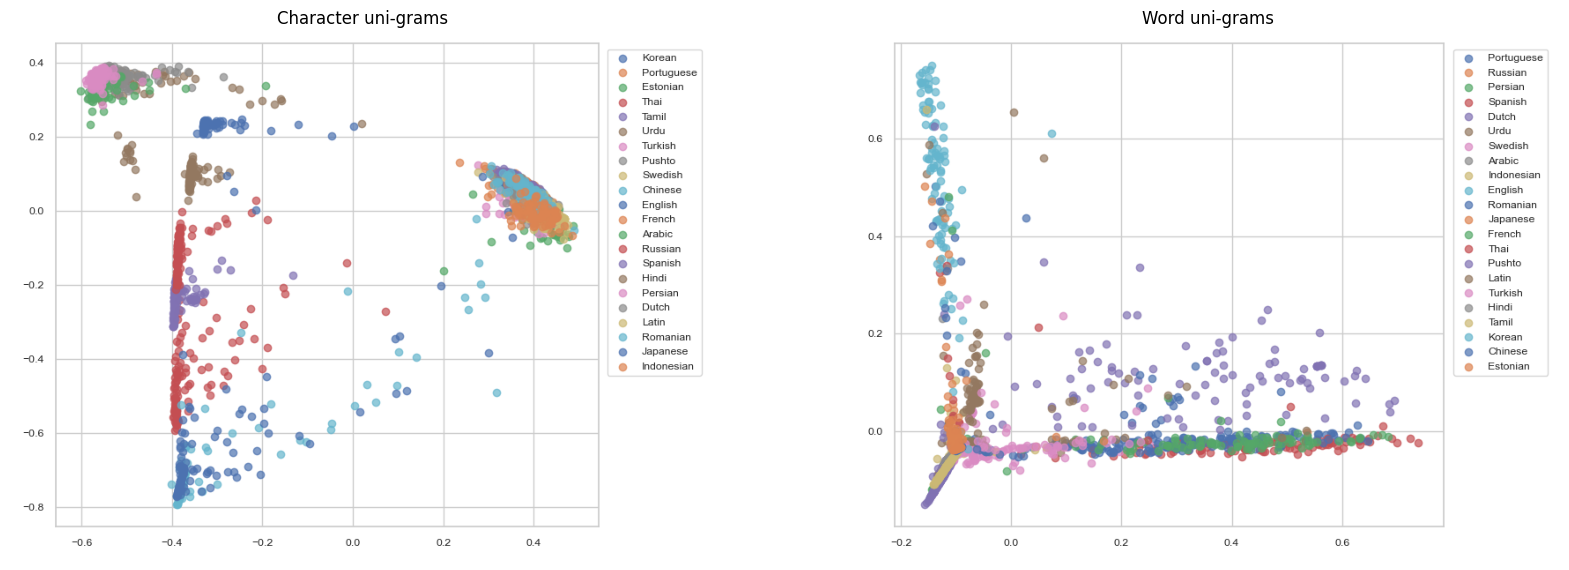

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
img1 = mpimg.imread('../reports/milestone-1/fig/char_unigram_val_set_pca.png')
img2 = mpimg.imread('../reports/milestone-1/fig/word_unigram_val_set_pca.png')

# Create side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title("Character uni-grams")

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title("Word uni-grams")

plt.show()

Before we take a closer look at the plots, we take a look at the explained variance:

| Uni-gram type | Vocab size | Explained variance (PC1) | Explained variance (PC2) |
|---------------|------------|--------------------------|--------------------------|
| char          | 256        | 0.31836348               | 0.14990362               |
| word          | 8192       | 0.05999805               | 0.02595775               |

The explained variance of the first two principal components is much higher for character uni-grams than for word uni-grams. The PCs for the character uni-gram configuration cover almost half (46.8%) of the variance, while the PCs for the word uni-gram configuration cover only 8.6% of the variance.

This is why the plot for character uni-grams shows more compact, better-separated clusters. In general, character-level features often capture “broad stroke” distinctions (e.g., different scripts) in fewer dimensions, while word-level features spread out their variance across thousands of dimensions—leading to less obvious clustering in just 2D.

If we take a closer look at the cluster, we can observe three clusters:

1. **European languages:** The cluster on the upper right side of the plot contains most European languages like English, Spanish, Dutch, Estonian etc.. These languages are written in Latin script and share many characters. In two-dimensions they overlap a lot, signifying the need for more dimensions to separate them.

2. **Indo-Iranian/semitic languages:** The cluster on the upper left side of the plot contains languages like Arabic, Persian, Hindi, Urdu etc.. These languages are written in Arabic script and share many characters.

3. **Asian languages:** The rather vertically stretched "cluster" in the middle
contains languages like Chinese, Japanese, Russian etc.. These languages are written in different scripts and have less character overlap. This is why they are more spread out in the plot.
